### 네이버 API 샘플

In [1]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색
import os
import sys
import urllib.request
client_id = "1J8AA25gNpLQl6ddcR8l"
client_secret = "HOYGXlyWjm"
encText = urllib.parse.quote("몰스킨")
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Mon, 02 Nov 2020 13:30:26 +0900",
"total": 40882,
"start": 1,
"display": 10,
"items": [
{
"title": "Book Depository에서 <b>몰스킨</b> 직구하기",
"link": "https:\/\/blog.naver.com\/kimeunsol95?Redirect=Log&logNo=221729869088",
"description": "2020년부터 <b>몰스킨</b> 모으기 도전^*^ 동네 교보문고에서 이것저것 만져보고 다른 사람들은 뭐 쓰나 검색도 해보면서 그렇게 한 달을 고민한 결과 내가 고른 다이어리는 <b>몰스킨</b> 데일리 포켓 블랙 하드커버... ",
"bloggername": "은솔리튜드",
"bloggerlink": "https://blog.naver.com/kimeunsol95",
"postdate": "20191207"

},
{
"title": "2021년 다이어리, 10년째 <b>몰스킨</b> (내가 쓰는 노트)",
"link": "https:\/\/blog.naver.com\/merry_mayy?Redirect=Log&logNo=222125200633",
"description": "아무리 고민해도 어차피 정답은 <b>몰스킨</b> ! ! ! 대학교 3-4학년 무렵부터 쓰기 시작했으니, 벌써 <b>몰스킨</b>과 나와의 인연도 얼추 10년이 되어간다. 그간 양지사, 무인양품, 윈키아 등 다이어리로 유명한 타사 제품으로... ",
"bloggername": "단순한 삶과 가벼운 일상",
"bloggerlink": "https://blog.naver.com/merry_mayy",
"postdate": "20201024"

},
{
"title": "앨리스 in 이탈리아 밀라노 여행:: <b>몰스킨</b> 카페♥",
"link": "https:\/\/blog.naver.com\/punky85?Redirect=Log&logNo=

### 네이버 쇼핑에서 몰스킨 다이어리 쇼핑 정보 크롤링

In [8]:
def gen_search_url(api_node, search_text, start_num, disp_num):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

In [9]:
gen_search_url('shop', 'TEST', 10, 3)

'https://openapi.naver.com/v1/search/shop.json?query=TEST&start=10&display=3'

In [11]:
import json
import datetime

def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)

    response = urllib.request.urlopen(request)
    
    print("[%s] Url Request Success" % datetime.datetime.now())
    
    return json.loads(response.read().decode("utf-8"))

In [12]:
client_id = "1J8AA25gNpLQl6ddcR8l"
client_secret = "HOYGXlyWjm"

url = gen_search_url("shop", "몰스킨", 1, 5)
one_result = get_result_onpage(url)

[2020-11-02 13:40:32.371383] Url Request Success


In [13]:
one_result

{'lastBuildDate': 'Mon, 02 Nov 2020 13:40:32 +0900',
 'total': 39356,
 'start': 1,
 'display': 5,
 'items': [{'title': '<b>몰스킨</b> 2021 다이어리 데일리 위클리 먼슬리 A5 고급 명품 감성 업무용 회사 기업 각인',
   'link': 'https://search.shopping.naver.com/gate.nhn?id=82635708485',
   'image': 'https://shopping-phinf.pstatic.net/main_8263570/82635708485.jpg',
   'lprice': '24100',
   'hprice': '0',
   'mallName': '에코펜',
   'productId': '82635708485',
   'productType': '2',
   'brand': '몰스킨',
   'maker': '몰스킨',
   'category1': '생활/건강',
   'category2': '문구/사무용품',
   'category3': '다이어리/플래너',
   'category4': '다이어리'},
  {'title': '<b>몰스킨</b> <b>몰스킨</b> 2021 데일리 12M 다이어리 소프트커버 라지 사파이어블루',
   'link': 'https://search.shopping.naver.com/gate.nhn?id=24014109279',
   'image': 'https://shopping-phinf.pstatic.net/main_2401410/24014109279.20200903005345.jpg',
   'lprice': '24900',
   'hprice': '49640',
   'mallName': '네이버',
   'productId': '24014109279',
   'productType': '1',
   'brand': '몰스킨',
   'maker': '몰스킨',
   'category1':

In [22]:
one_result['items'][0]

{'title': '<b>몰스킨</b> 2021 다이어리 데일리 위클리 먼슬리 A5 고급 명품 감성 업무용 회사 기업 각인',
 'link': 'https://search.shopping.naver.com/gate.nhn?id=82635708485',
 'image': 'https://shopping-phinf.pstatic.net/main_8263570/82635708485.jpg',
 'lprice': '24100',
 'hprice': '0',
 'mallName': '에코펜',
 'productId': '82635708485',
 'productType': '2',
 'brand': '몰스킨',
 'maker': '몰스킨',
 'category1': '생활/건강',
 'category2': '문구/사무용품',
 'category3': '다이어리/플래너',
 'category4': '다이어리'}

In [56]:
# 데이터프레임으로 만들기
import pandas as pd

def get_fields(json_data):
    title = [each["title"] for each in json_data["items"]]
    link = [each["link"] for each in json_data["items"]]
    lprice = [each["lprice"] for each in json_data["items"]]
    hprice = [each["hprice"] for each in json_data["items"]]
    mall_name = [each["mallName"] for each in json_data["items"]]
    
    result_pd = pd.DataFrame({"title": title, "lprice": lprice,
                             "hprice": hprice, "link": link,
                             "mall": mall_name},
                            columns=["title", "lprice", "hprice", "link", "mall"])
    return result_pd

In [57]:
# 태그 제거 함수 선언
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    
    return input_str

In [58]:
import pandas as pd

def get_fields(json_data):
    title = [delete_tag(each["title"]) for each in json_data["items"]]
    link = [each["link"] for each in json_data["items"]]
    lprice = [each["lprice"] for each in json_data["items"]]
    hprice = [each["hprice"] for each in json_data["items"]]
    mall_name = [each["mallName"] for each in json_data["items"]]
    
    result_pd = pd.DataFrame({"title": title, "lprice": lprice,
                             "hprice": hprice, "link": link,
                             "mall": mall_name},
                            columns=["title", "lprice", "hprice", "link", "mall"])
    return result_pd

In [59]:
url = gen_search_url("shop", "몰스킨", 1, 5)
json_result = get_result_onpage(url)
pd_result = get_fields(json_result)

[2020-11-02 14:06:48.446336] Url Request Success


In [60]:
pd_result

,title,lprice,hprice,link,mall
0,몰스킨 2021 다이어리 데일리 위클리 먼슬리 A5 고급 명품 감성 업무용 회사 기...,24100,0,https://search.shopping.naver.com/gate.nhn?id=...,에코펜
1,몰스킨 몰스킨 2021 데일리 12M 다이어리 소프트커버 라지 사파이어블루,24900,49640,https://search.shopping.naver.com/gate.nhn?id=...,네이버
2,몰스킨 클래식노트 플레인 하드 L,17970,59400,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,몰스킨 클래식노트 플레인 W.그린 하드,18390,36900,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,몰스킨2021 먼슬리 하드 포켓P 무료각인,13400,26800,https://search.shopping.naver.com/gate.nhn?id=...,네이버


In [61]:
result_mol = []

for n in range(1, 1000, 100):
    url = gen_search_url("shop", "몰스킨", n, 100)
    json_result = get_result_onpage(url)
    pd_result = get_fields(json_result)
    
    result_mol.append(pd_result)
    
result_mol = pd.concat(result_mol)

[2020-11-02 14:06:50.839970] Url Request Success
[2020-11-02 14:06:51.010510] Url Request Success
[2020-11-02 14:06:51.160550] Url Request Success
[2020-11-02 14:06:51.439977] Url Request Success
[2020-11-02 14:06:51.740536] Url Request Success
[2020-11-02 14:06:51.943975] Url Request Success
[2020-11-02 14:06:52.116542] Url Request Success
[2020-11-02 14:06:52.353325] Url Request Success
[2020-11-02 14:06:52.532858] Url Request Success
[2020-11-02 14:06:52.693178] Url Request Success


In [62]:
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1000 non-null   object
 1   lprice  1000 non-null   object
 2   hprice  1000 non-null   object
 3   link    1000 non-null   object
 4   mall    1000 non-null   object
dtypes: object(5)
memory usage: 46.9+ KB


In [63]:
result_mol.reset_index(drop=True, inplace=True)
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1000 non-null   object
 1   lprice  1000 non-null   object
 2   hprice  1000 non-null   object
 3   link    1000 non-null   object
 4   mall    1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [64]:
result_mol.head()

,title,lprice,hprice,link,mall
0,몰스킨 2021 다이어리 데일리 위클리 먼슬리 A5 고급 명품 감성 업무용 회사 기...,24100,0,https://search.shopping.naver.com/gate.nhn?id=...,에코펜
1,몰스킨 몰스킨 2021 데일리 12M 다이어리 소프트커버 라지 사파이어블루,24900,49640,https://search.shopping.naver.com/gate.nhn?id=...,네이버
2,몰스킨 클래식노트 플레인 하드 L,17970,59400,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,몰스킨 클래식노트 플레인 W.그린 하드,18390,36900,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,몰스킨 클래식 룰드 줄지,19060,36900,https://search.shopping.naver.com/gate.nhn?id=...,네이버


In [65]:
result_mol["lprice"] = result_mol["lprice"].astype("float")
result_mol["hprice"] = result_mol["hprice"].astype("float")
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1000 non-null   object 
 1   lprice  1000 non-null   float64
 2   hprice  1000 non-null   float64
 3   link    1000 non-null   object 
 4   mall    1000 non-null   object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


In [75]:
writer = pd.ExcelWriter("./data/06_molskin_diary_naver_shop.xlsx",
                       engine='xlsxwriter')
result_mol.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book
worksheet = writer.sheets["Sheet1"]
worksheet.set_column("A:A", 4)
worksheet.set_column("B:B", 60)
worksheet.set_column("C:C", 10)
worksheet.set_column("D:D", 10)
worksheet.set_column("E:E", 50)
worksheet.set_column("F:F", 10)

worksheet.conditional_format("C2:C1001", {"type": "3_color_scale"})

writer.save()

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "/Library/Fonts/Arial Unicode.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

/Users/jaecheolchoi/opt/anaconda3/envs/dss/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


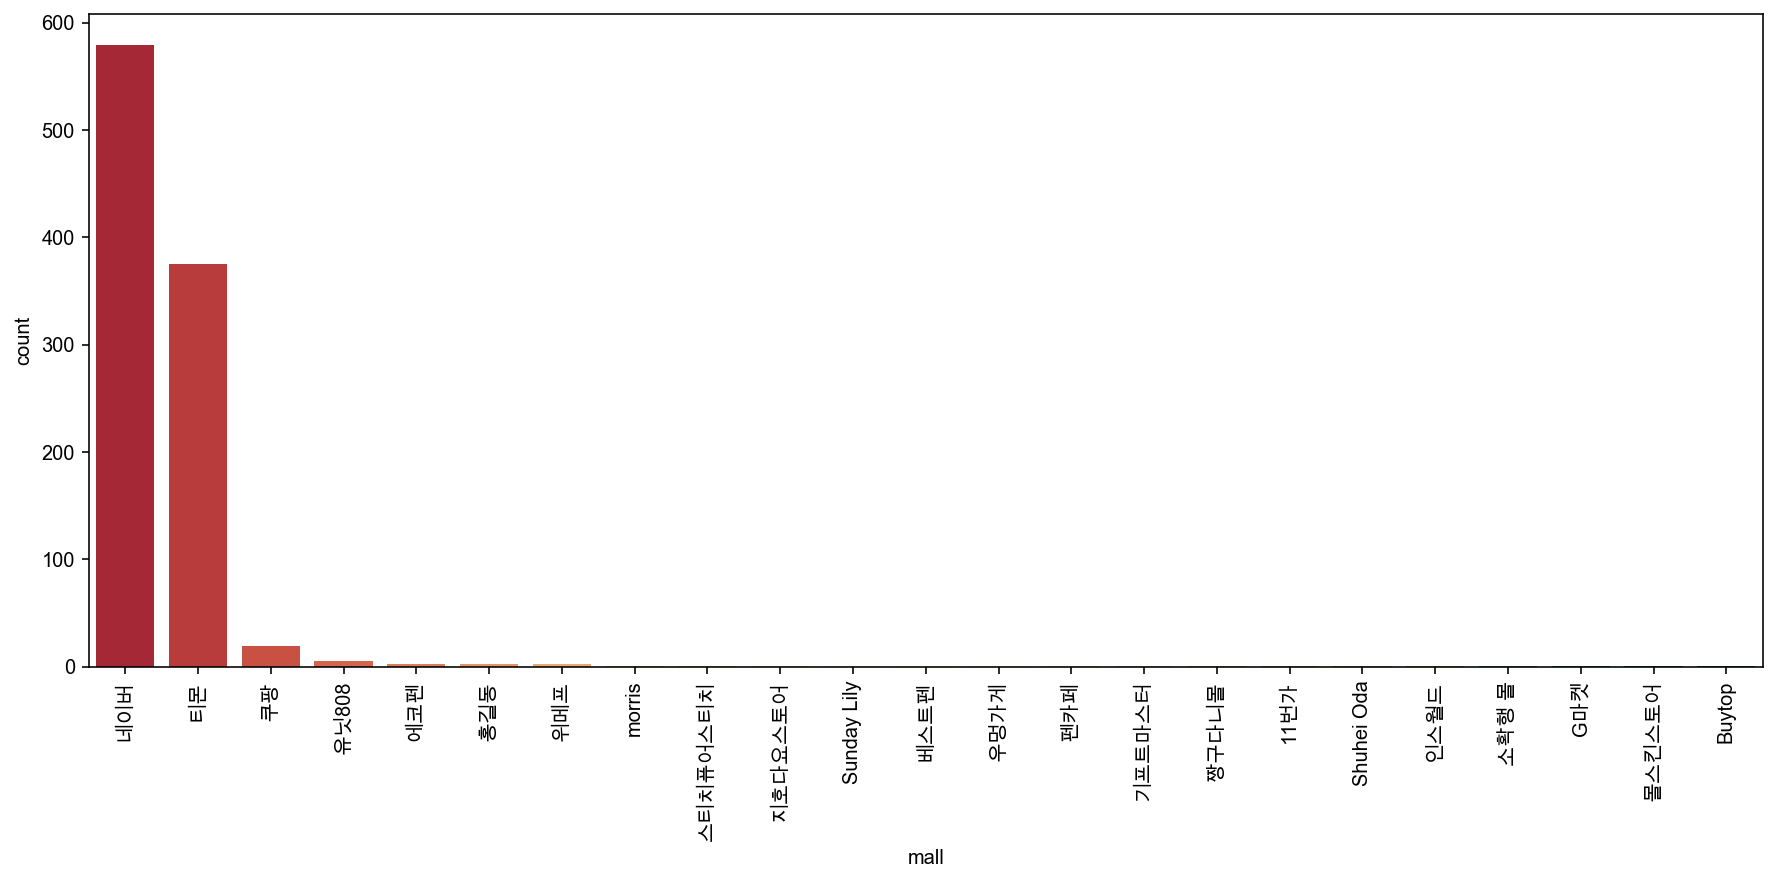

In [81]:
plt.figure(figsize=(15,6))
sns.countplot("mall", data=result_mol, palette="RdYlGn",
             order=result_mol["mall"].value_counts().index)
plt.xticks(rotation=90)
plt.show()